<a href="https://colab.research.google.com/github/Sagalo04/Interpolation/blob/master/Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Interpolación y Transformación** #



In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

path='/content/drive/My Drive/PDI/Interpolation/'
os.chdir(path)
!pwd
# graficar imagenes estadisticas en el notebook

%matplotlib inline

/content/drive/My Drive/PDI/Interpolation


In [0]:
def displayGray3(a,b,c,title1 = "Original", title2="Edited", title3="Edited"):
  plt.figure(figsize=(3,3))
  plt.subplot(131), plt.imshow(a,cmap='gray'), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(132), plt.imshow(b,cmap='gray'), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.subplot(133), plt.imshow(c,cmap='gray'), plt.title(title3)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def displayGray2(a,b,title1 = "Original", title2="Edited"):
  plt.figure(figsize=(10,10))
  plt.subplot(121), plt.imshow(a,cmap='gray'), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(b,cmap='gray'), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def displayColor3(a,b,c,title1 = "Original", title2="Edited", title3="Edited"):
  plt.figure(figsize=(10,10))
  plt.subplot(131), plt.imshow(a), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(132), plt.imshow(b), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.subplot(133), plt.imshow(c), plt.title(title3)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def displayColor2(a,b,title1 = "Original", title2="Edited"):
  plt.figure(figsize=(10,10))
  plt.subplot(121), plt.imshow(a), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(b), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def readRGB(imgPath):
  img=cv2.imread(imgPath)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  return img

# **Interpolación Nearest Neighbour**#

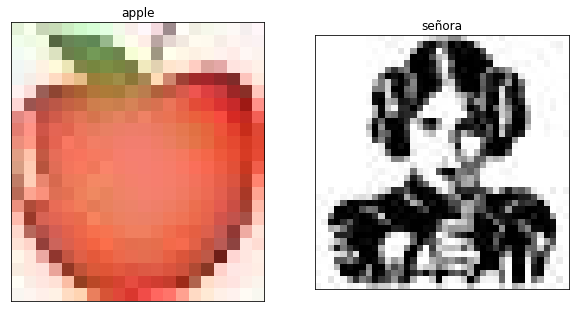

In [35]:
imgA = readRGB('apple20x22.jpg')
imgM = readRGB('ico.jpg')
near_imgA = cv2.resize(imgA,None,fx = 5,fy=5,interpolation = cv2.INTER_NEAREST)
near_imgM = cv2.resize(imgM,None,fx = 5,fy=5,interpolation = cv2.INTER_NEAREST)
displayColor2(near_imgA,near_imgM,'apple','señora')

# **Interpolación BiLinear**

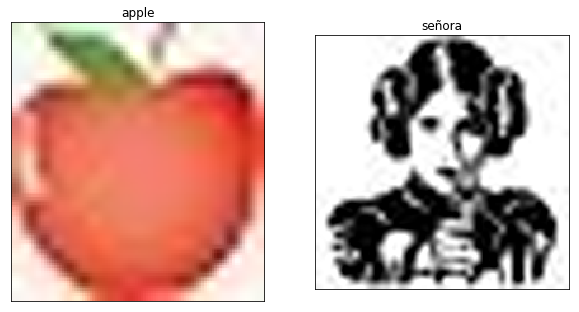

In [34]:
imgA = readRGB('apple20x22.jpg')
imgM = readRGB('ico.jpg')
bili_imgA = cv2.resize(imgA,None,fx = 5,fy=5,interpolation = cv2.INTER_LINEAR)
bili_imgM = cv2.resize(imgM,None,fx = 5,fy=5,interpolation = cv2.INTER_LINEAR)
displayColor2(near_imgA,near_imgM,'apple','señora')

# **Interpolación BiCubic**

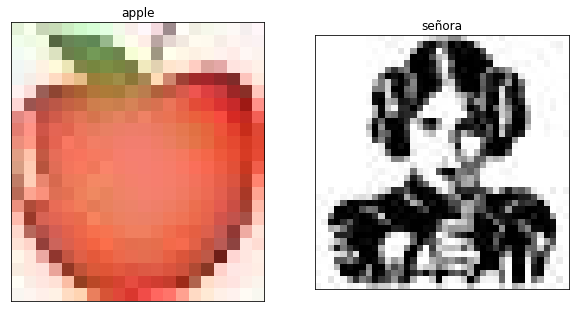

In [37]:
imgA = readRGB('apple20x22.jpg')
imgM = readRGB('ico.jpg')
bicu_imgA = cv2.resize(imgA,None,fx = 5,fy=5,interpolation = cv2.INTER_CUBIC)
bicu_imgM = cv2.resize(imgM,None,fx = 5,fy=5,interpolation = cv2.INTER_CUBIC)
displayColor2(near_imgA,near_imgM,'apple','señora')

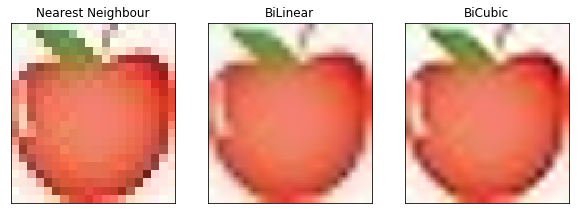

In [43]:
displayColor3(near_imgA,bili_imgA,bicu_imgA,'Nearest Neighbour','BiLinear','BiCubic')